<a href="https://colab.research.google.com/github/JKTajo/Data-Analysis-with-Open-Source/blob/main/14%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install "numpy<2.0"

In [3]:
# 4bit VLM 처리를 위한 bitsandbytes 설치
# LLM 처리를 위한 VLLM 설치 (오래걸리는 작업(>5분)이므로 미리 실행!)
!pip install bitsandbytes==0.45.3 vllm==0.7.3 transformers==4.48.2
# 필요 시 세션 재시작

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 7.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-python-headless to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.6/87.6 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/9

In [1]:
# 한글 처리를 위한 matplotlib 설정 (1)

!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,986 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121689 files and dire

세션 다시시작

In [1]:
# 한글 처리를 위한 matplotlib 설정 (2)

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

RSS 피드에서 url 유출

In [2]:
import requests
from lxml import etree
from lxml.html import fromstring
import pandas as pd

def extract_unique_images(rss_url):
    ## 주어진 RSS 피드 URL에서 고유한 이미지 URL들을 추출하는 함수 정의
    try:
        ## requests 라이브러리를 사용하여 RSS 피드 URL로부터 내용을 가져옴
        response = requests.get(rss_url)
        ## 가져온 XML 응답 내용을 lxml의 etree.fromstring으로 파싱하여 XML 트리 root를 생성
        root = etree.fromstring(response.content)

        image_urls = set() #중복제거

        ## XML 트리에서 모든 'item' 태그를 XPath를 사용하여 순회
        for item in root.xpath('//item'):
            description = item.find('description')
            if description is not None and description.text: #description이 유효한지 체크
                ## description의 텍스트 내용을 lxml.html.fromstring으로 파싱하여 HTML 트리를 생성
                html_tree = fromstring(description.text)

                ## HTML 트리에서 첫 번째 <img> 태그의 'src' 속성 값을 XPath를 사용하여 추출
                img_url = html_tree.xpath('string(//img/@src)')

                if img_url:
                    image_urls.add(img_url)

        return list(image_urls)

    except Exception as e:
        ## 오류 발생 시 오류 메시지를 출력하고 빈 리스트를 반환
        print(f"Error occurred: {e}")
        return []

rss_url = "https://glltn.com/feed/"
## extract_unique_images 함수를 호출하여 고유한 이미지 URL들을 추출
unique_images = extract_unique_images(rss_url)

## 추출된 이미지 URL 리스트를 사용하여 'image'라는 열을 가진 pandas DataFrame을 생성
df = pd.DataFrame(unique_images, columns=["image"])

In [3]:
df

,image
0,https://glltn.com/wp-content/blogs.dir/1/files...
1,https://glltn.com/wp-content/blogs.dir/1/files...
2,https://glltn.com/wp-content/blogs.dir/1/files...
3,https://glltn.com/wp-content/blogs.dir/1/files...
4,https://glltn.com/wp-content/blogs.dir/1/files...
5,https://glltn.com/wp-content/blogs.dir/1/files...
6,https://glltn.com/wp-content/blogs.dir/1/files...
7,https://glltn.com/wp-content/blogs.dir/1/files...
8,https://glltn.com/wp-content/blogs.dir/1/files...
9,https://glltn.com/wp-content/blogs.dir/1/files...


14-2 수집데이터 확인

In [4]:
from IPython.display import display, HTML

def path_to_image_html(path):
    ## 이미지 경로를 HTML img 태그로 변환하는 함수
    return f'<img src="{path}" width="300" />'

## DataFrame의 스타일을 설정하여 이미지 너비를 300px로 지정
df.style.set_table_styles([{'selector': 'img', 'props': 'width: 300px;'}])

## DataFrame을 HTML로 변환하여 출력. 이미지 열은 path_to_image_html 함수로 포맷팅
display(HTML(df.to_html(escape=False, formatters=dict(**{'image': path_to_image_html}))))

,image
0,
1,
2,
3,
4,
5,
6,
7,
8,
9,


14-3 **vllm모델** 로드,

In [5]:
import torch
from PIL import Image
from transformers import AutoModel, AutoTokenizer

## 'openbmb/MiniCPM-V-2_6-int4' 모델을 사전 훈련된 가중치와 함께 로드
## trust_remote_code=True는 허브에서 사용자 정의 코드를 실행할 수 있도록 허용
model = AutoModel.from_pretrained('openbmb/MiniCPM-V-2_6-int4', trust_remote_code=True)
## 로드된 모델에 해당하는 토크나이저를 로드
tokenizer = AutoTokenizer.from_pretrained('openbmb/MiniCPM-V-2_6-int4', trust_remote_code=True)
## 모델을 평가 모드로 설정 (드롭아웃 등 훈련 시에만 필요한 기능 비활성화)
model.eval()

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
A new version of the following files was downloaded from https://huggingface.co/openbmb/MiniCPM-V-2_6-int4:
- modeling_navit_siglip.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/openbmb/MiniCPM-V-2_6-int4:
- resampler.py
. Make sure to double-check they do not contain any added malicious code. 

model.safetensors.index.json: 0.00B [00:00, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.45G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/121 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenization_minicpmv_fast.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/openbmb/MiniCPM-V-2_6-int4:
- tokenization_minicpmv_fast.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

MiniCPMV(
  (llm): Qwen2ForCausalLM(
    (model): Qwen2Model(
      (embed_tokens): Embedding(151666, 3584)
      (layers): ModuleList(
        (0-27): 28 x Qwen2DecoderLayer(
          (self_attn): Qwen2Attention(
            (q_proj): Linear4bit(in_features=3584, out_features=3584, bias=True)
            (k_proj): Linear4bit(in_features=3584, out_features=512, bias=True)
            (v_proj): Linear4bit(in_features=3584, out_features=512, bias=True)
            (o_proj): Linear4bit(in_features=3584, out_features=3584, bias=False)
          )
          (mlp): Qwen2MLP(
            (gate_proj): Linear4bit(in_features=3584, out_features=18944, bias=False)
            (up_proj): Linear4bit(in_features=3584, out_features=18944, bias=False)
            (down_proj): Linear4bit(in_features=18944, out_features=3584, bias=False)
            (act_fn): SiLU()
          )
          (input_layernorm): Qwen2RMSNorm((3584,), eps=1e-06)
          (post_attention_layernorm): Qwen2RMSNorm((3584,), eps=

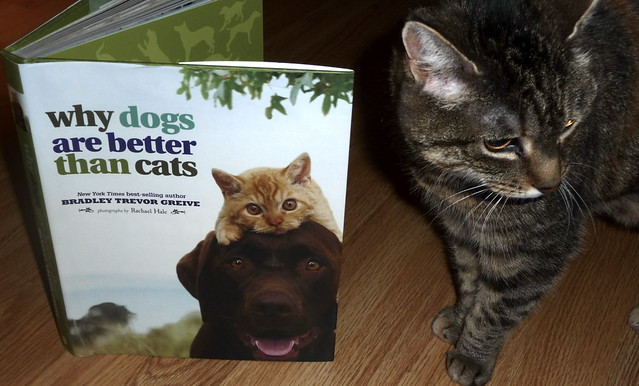

14-4 이미지 질문 응답예시

In [6]:
from transformers import set_seed

## 재현성을 위해 시드(seed)를 42로 설정
set_seed(42)
## 예시 이미지 URL 정의
image_url = 'https://farm3.staticflickr.com/2677/4434956914_6e95a22940_z.jpg'
## requests로 이미지 다운로드 후 PIL Image 객체로 열고 RGB 형식으로 변환
image = Image.open(requests.get(image_url, stream=True).raw).convert('RGB')
## 이미지에 대한 질문 정의
question = 'how many cats in the photo?'
## 모델 입력 형식에 맞춰 메시지 구성 (이미지와 질문 포함)
msgs = [{'role': 'user', 'content': [image, question]}]
## 모델의 chat 함수를 호출하여 이미지와 질문에 대한 응답 생성
result = model.chat(image=None, msgs=msgs, tokenizer=tokenizer)
## 모델의 응답 출력
print(result)

preprocessor_config.json:   0%|          | 0.00/714 [00:00<?, ?B/s]

processing_minicpmv.py: 0.00B [00:00, ?B/s]

image_processing_minicpmv.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/openbmb/MiniCPM-V-2_6-int4:
- image_processing_minicpmv.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/openbmb/MiniCPM-V-2_6-int4:
- processing_minicpmv.py
- image_processing_minicpmv.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.12/dist-packages/transformers/models/auto/image_processing_auto.py:590: FutureWarning: The image_processor_class argument is deprecated and will be removed in v4.42. Please use `slow_image_processor_class`, or `fast_image_processor_class` instead
  warnings.warn(
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=

1


In [7]:
set_seed(42)
## 이미지에 대한 질문을 업데이트. 책 표지의 고양이도 포함하도록 요청
question = 'how many cats in the photo? including the books cover.'
## 모델 입력 형식에 맞춰 메시지 구성 (이전에 로드된 이미지와 업데이트된 질문 포함)
msgs = [{'role': 'user', 'content': [image, question]}]
## 모델의 chat 함수를 호출하여 업데이트된 질문에 대한 응답 생성
result = model.chat(image=None, msgs=msgs, tokenizer=tokenizer)
## 모델의 응답 출력
print(result)

1


In [8]:
set_seed(42)
## 이미지에 대한 질문을 'describe the photo'로 설정하여 이미지 내용을 설명하도록 요청
question = 'describe the photo'
## 모델 입력 형식에 맞춰 메시지 구성 (이전에 로드된 이미지와 설명 요청 질문 포함)
msgs = [{'role': 'user', 'content': [image, question]}]
## 모델의 chat 함수를 호출하여 이미지에 대한 설명을 생성
result = model.chat(image=None, msgs=msgs, tokenizer=tokenizer)
## 모델의 응답 (이미지 설명) 출력
print(result)

The photo shows a book titled "why dogs are better than cats" with an image of a cat on the cover, resting its head on a dog's back. To the right side of the frame is a real-life cat, standing and observing the camera, which has a similar striped pattern as the one depicted on the book cover. The setting appears to be indoors, possibly on a wooden surface or floor.


14-5 의류 이미지 여부 판단

In [9]:
def is_picture_of_clothing(image_url):
    ## 이미지 URL이 의류 사진인지 판단하는 함수
    # 의류가 포함된 사진인지 확인하는 질문 작성 (영어로)
    question = 'Is this a picture of clothing? MUST say yes or no.'
    image = Image.open(requests.get(image_url, stream=True).raw).convert('RGB')
    msgs = [{'role': 'user', 'content': [image, question]}]
    result = model.chat(image=None, msgs=msgs, tokenizer=tokenizer, temperature=0.1)
    print(result)
    ## 응답에 'yes'가 포함되어 있는지 확인하여 True/False 반환
    return 'yes' in result.lower()

## DataFrame의 'image' 열에 함수를 적용하여 'is_clothing' 열에 결과 저장
df['is_clothing'] = df['image'].apply(is_picture_of_clothing)

Yes, this image is of clothing. It showcases a person wearing a layered outfit that includes a dark-colored jacket over a brown sweater and what appears to be gray trousers or pants. The focus on the attire suggests it could be for fashion purposes, possibly for a catalog, advertisement, or a lookbook where clothing items are displayed in a styled manner.
Yes, this image is of clothing. The individuals are wearing what appears to be outdoor or adventure-style jackets and a backpack, which suggests that the photograph may have been taken in preparation for an activity such as hiking or camping. The focus on the attire indicates that it could indeed be showcasing clothing items, possibly for retail purposes or fashion inspiration.
Yes, this image is of clothing. It appears to showcase a collection or line of apparel, possibly for a fashion brand or catalog. The individuals are modeling the clothes in a way that highlights their features and design, which is typical in fashion photography

14-6 의류 판단 결과 시각화

In [10]:
display(HTML(df.to_html(escape=False, formatters=dict(**{'image': path_to_image_html}))))

,image,is_clothing
0,,True
1,,True
2,,True
3,,True
4,,True
5,,True
6,,False
7,,True
8,,True
9,,True


14-7 의류 이미지 필터링

In [11]:
## 'is_clothing' 열의 값이 True인 행들만 필터링하여 DataFrame을 업데이트
df = df[df['is_clothing']]

In [12]:
display(HTML(df.to_html(escape=False, formatters=dict(**{'image': path_to_image_html}))))

,image,is_clothing
0,,True
1,,True
2,,True
3,,True
4,,True
5,,True
7,,True
8,,True
9,,True
10,,True


14-8 의류 스타일 분석

In [13]:
def describe_style(image_url):
    ## 주어진 이미지 URL의 의류 스타일을 분석하는 함수
    question = 'Analyze the style of the clothes. Please let me explain the colors and trend changes.'
    image = Image.open(requests.get(image_url, stream=True).raw).convert('RGB')
    msgs = [{'role': 'user', 'content': [image, question]}]
    ## 모델의 chat 함수를 호출하여 이미지에 대한 스타일 분석 응답 생성
    result = model.chat(image=None, msgs=msgs, tokenizer=tokenizer)
    return result

## 필터링된 DataFrame의 'image' 열에 describe_style 함수를 적용
## 결과는 'style'이라는 새로운 열에 저장
df['style'] = df['image'].apply(describe_style)

/tmp/ipython-input-1874085826.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['style'] = df['image'].apply(describe_style)


In [14]:
display(HTML(df.to_html(escape=False, formatters=dict(**{'image': path_to_image_html}))))

,image,is_clothing,style
0,,True,"The style of the clothes in the image leans towards a casual, yet sophisticated aesthetic. The use of earthy tones like mustard yellow and brown suggests a preference for natural colors that are often associated with autumnal fashion trends. These colors tend to evoke a sense of warmth and comfort, which is reinforced by the layered look of the outfit.\n\nThe jacket appears to be made from a wool or wool-blend fabric, indicating an emphasis on texture and warmth, suitable for cooler weather. This type of garment is versatile and can be dressed up or down, fitting well within contemporary streetwear and smart-casual styles.\n\nThe central pendant necklace adds a unique touch to the ensemble, suggesting a personal flair and possibly hinting at an interest in accessories as a form of self-expression. The overall look is cohesive, with each piece complementing the others to create a harmonious appearance.\n\nIn terms of trend changes, this outfit reflects a shift towards more sustainable and timeless pieces rather than fast-fashion items. The choice of high-quality materials and classic colors indicates a move away from fleeting trends towards clothing that stands the test of time and can be worn in multiple seasons."
1,,True,"The style of the clothes in the image suggests a functional and outdoor-oriented fashion trend. The olive green color of both garments is often associated with military or utility wear, which has seen a resurgence in popularity as part of contemporary streetwear and casual fashion trends. This color choice not only provides a neutral base that pairs well with various other colors but also serves practical purposes such as blending into natural environments.\n\nThe hooded design indicates an emphasis on comfort and protection against weather elements, hinting at a utilitarian approach to clothing that prioritizes functionality over formality. The texture of the backpack, appearing crinkled, adds a tactile element that could be indicative of durability and ruggedness, appealing to those who value practicality in their accessories.\n\nOverall, the combination of these elements points towards a modern aesthetic that merges traditional outdoor gear with urban fashion sensibilities, catering to consumers who seek versatility and practicality in their wardrobe choices."
2,,True,"The style of the clothes worn by the individuals in the image reflects a casual and contemporary fashion trend. The man's outfit, consisting of a denim jacket over a collared shirt, is reminiscent of classic streetwear, which often incorporates durable materials like denim for its comfort and versatility. Denim has been a staple in fashion for decades due to its timeless appeal.\n\nThe woman's tie-dye jacket introduces a vibrant splash of color that is indicative of a trend towards bold, eye-catching prints. Tie-dye patterns have experienced revivals in various forms throughout different eras, often associated with counterculture movements and summer styles. The combination of this pattern with a simple white t-shirt underneath suggests an intention to balance out the vividness of the outerwear with more neutral tones, creating a balanced look.\n\nBoth outfits reflect a modern approach to casual wear, where individuality and personal expression are key elements. The choice of colors, from the deep blue of the denim to the neon green hues of the tie-dye, showcases a willingness to experiment with fashion trends while maintaining a cohesive overall aesthetic. This blend of classic and trendy elements indicates a fashion-forward yet practical sense of style."
3,,True,"The shoes in the image reflect a style that merges functionality with fashion. The color palette is earthy and muted, featuring shades of beige and olive green. This choice of colors suggests an aesthetic that leans towards natural tones, which are often associated with outdoor or military-inspired fashion trends.\n\nThe use of durable materials 

14-9 언어 모델로드

In [15]:
from vllm import LLM, SamplingParams

## vLLM 라이브러리를 사용하여 'LGAI-EXAONE/EXAONE-3.5-2.4B-Instruct' 모델을 로드
## gpu_memory_utilization은 GPU 메모리 사용 비율을 0.5로 설정
## max_model_len은 모델이 처리할 수 있는 최대 토큰 길이를 10000으로 설정
llm = LLM(model='LGAI-EXAONE/EXAONE-3.5-2.4B-Instruct',gpu_memory_utilization=0.5, max_model_len = 1000)

INFO 01-27 11:41:09 __init__.py:207] Automatically detected platform cuda.


config.json: 0.00B [00:00, ?B/s]

INFO 01-27 11:41:09 config.py:2444] Downcasting torch.float32 to torch.float16.
INFO 01-27 11:41:30 config.py:549] This model supports multiple tasks: {'embed', 'score', 'classify', 'reward', 'generate'}. Defaulting to 'generate'.
INFO 01-27 11:41:30 llm_engine.py:234] Initializing a V0 LLM engine (v0.7.3) with config: model='LGAI-EXAONE/EXAONE-3.5-2.4B-Instruct', speculative_config=None, tokenizer='LGAI-EXAONE/EXAONE-3.5-2.4B-Instruct', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=1000, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto,  device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='xgrammar'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=F

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/563 [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

INFO 01-27 11:41:33 cuda.py:178] Cannot use FlashAttention-2 backend for Volta and Turing GPUs.
INFO 01-27 11:41:33 cuda.py:226] Using XFormers backend.
INFO 01-27 11:41:34 model_runner.py:1110] Starting to load model LGAI-EXAONE/EXAONE-3.5-2.4B-Instruct...
INFO 01-27 11:41:34 weight_utils.py:254] Using model weights format ['*.safetensors']


model-00001-of-00002.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.65G [00:00<?, ?B/s]

INFO 01-27 11:43:22 weight_utils.py:270] Time spent downloading weights for LGAI-EXAONE/EXAONE-3.5-2.4B-Instruct: 108.179429 seconds


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Loading safetensors checkpoint shards:   0% Completed | 0/2 [00:00<?, ?it/s]


INFO 01-27 11:44:01 model_runner.py:1115] Loading model weights took 4.5146 GB
INFO 01-27 11:44:03 worker.py:267] Memory profiling takes 1.03 seconds
INFO 01-27 11:44:03 worker.py:267] the current vLLM instance can use total_gpu_memory (14.74GiB) x gpu_memory_utilization (0.50) = 7.37GiB
INFO 01-27 11:44:03 worker.py:267] model weights take 4.51GiB; non_torch_memory takes 0.02GiB; PyTorch activation peak memory takes 0.94GiB; the rest of the memory reserved for KV Cache is 1.90GiB.
INFO 01-27 11:44:03 executor_base.py:111] # cuda blocks: 1659, # CPU blocks: 3495
INFO 01-27 11:44:03 executor_base.py:116] Maximum concurrency for 1000 tokens per request: 26.54x
INFO 01-27 11:44:09 model_runner.py:1434] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI. If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utili

Capturing CUDA graph shapes: 100%|██████████| 35/35 [00:37<00:00,  1.07s/it]

INFO 01-27 11:44:46 model_runner.py:1562] Graph capturing finished in 37 secs, took 0.21 GiB
INFO 01-27 11:44:46 llm_engine.py:436] init engine (profile, create kv cache, warmup model) took 44.76 seconds


14-10 색상 정보 추출

In [16]:
from vllm import SamplingParams ## SamplingParams 임포트가 필요

def extract_color(style):
  ## 주어진 스타일 설명 텍스트에서 색상을 한글로 추출하는 함수
  prompt = [
      {
          "role": "system",
          "content": "You are EXAONE model from LG AI Research, a helpful assistant."
      },
      {
          "role": "user",
          "content": f"다음의 글에서 색상을 한글로 추출해주세요. 색상외에 다른 정보는 적지 말아주세요.\n{style}" # vlm이 작성한 글에서 색상 정보 추출, 한글로 번역하면서
      }
  ]
  ## 샘플링 파라미터 설정 (온도, top_p, 최대 토큰 수)
  sampling_params = SamplingParams(temperature=0.2, top_p=0.95, max_tokens=1024)
  ## LLM 모델을 사용하여 프롬프트에 대한 응답 생성
  result = llm.chat(prompt, sampling_params)[0].outputs[0].text
  print(result)
  return result

## DataFrame의 'style' 열에 extract_color 함수를 적용
## 결과는 'color'라는 새로운 열에 저장
df['color'] = df['style'].apply(extract_color)

INFO 01-27 11:46:31 chat_utils.py:332] Detected the chat template content format to be 'string'. You can set `--chat-template-content-format` to override this.


Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  1.46it/s, est. speed input: 437.26 toks/s, output: 20.47 toks/s]


**색상:**
- 머스타드 옐로우
- 갈색


Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s, est. speed input: 971.91 toks/s, output: 27.32 toks/s]


**색상:** 올리브 그린


Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s, est. speed input: 708.02 toks/s, output: 32.08 toks/s]


- ** denim (파란색)**
- ** neon green**


Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  2.65it/s, est. speed input: 687.03 toks/s, output: 31.83 toks/s]


**색상:**
- 베이지
- 올리브 그린


Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  6.98it/s, est. speed input: 1889.78 toks/s, output: 14.05 toks/s]


파란색


Processed prompts: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it, est. speed input: 178.95 toks/s, output: 40.46 toks/s]


- **카드igan** (Cardigan)
- **스트라이프 셔츠** (Striped Shirt)
- **숏츠** (Shorts)
- **올리브 그린** (Olive Green)
- **브라운** (Brown)


Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s, est. speed input: 615.05 toks/s, output: 33.30 toks/s]


- 네이비 블루 (Navy Blue)
- 브라운 (Brown)


Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  3.13it/s, est. speed input: 936.51 toks/s, output: 28.28 toks/s]


- Grey
- Black
- Brown


Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  1.72it/s, est. speed input: 439.15 toks/s, output: 37.89 toks/s]


색상:
- 네이비 (navy)
- 흰색 (white)
- 파란색 (blue)


Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  3.20it/s, est. speed input: 906.89 toks/s, output: 28.84 toks/s]

- 올리브 그린 (Olive Green)



/tmp/ipython-input-2329378782.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color'] = df['style'].apply(extract_color)


14-11 스타일 키워드 추출

In [17]:
from vllm import SamplingParams ## SamplingParams 임포트가 필요

def extract_style(style):
  ## 주어진 스타일 설명 텍스트에서 스타일 키워드를 한글로 추출하는 함수
  prompt = [
      {
          "role": "system",
          "content": "You are EXAONE model from LG AI Research, a helpful assistant."
      },
      {
          "role": "user",
          "content": f"다음의 글에서 스타일 키워드를 한글로 추출해주세요. 스타일 키워드 외에 다른 정보는 적지 말아주세요.\n{style}" # vlm이 작성한 글에서 스타일 키워드 추출, 한글로 번역하면서
      }
  ]
  ## 샘플링 파라미터 설정 (온도, top_p, 최대 토큰 수)
  sampling_params = SamplingParams(temperature=0.2, top_p=0.95, max_tokens=1024)
  ## LLM 모델을 사용하여 프롬프트에 대한 응답 생성
  result = llm.chat(prompt, sampling_params)[0].outputs[0].text
  print(result)
  return result

## DataFrame의 'style' 열에 extract_color 함수를 적용 (함수 이름은 이전과 동일하지만 기능 변경)
## 결과는 'keyword'라는 새로운 열에 저장
df['keyword'] = df['style'].apply(extract_color)


Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  2.09it/s, est. speed input: 625.32 toks/s, output: 25.10 toks/s]


**색상:**
- mustard yellow
- brown


Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  3.35it/s, est. speed input: 844.41 toks/s, output: 23.74 toks/s]


**색상:** 올리브 그린


Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  1.90it/s, est. speed input: 588.17 toks/s, output: 26.65 toks/s]


- ** denim (파란색)**
- ** neon green**


Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  2.16it/s, est. speed input: 574.66 toks/s, output: 26.62 toks/s]


**색상:**
- 베이지
- 올리브 그린


Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s, est. speed input: 664.41 toks/s, output: 4.94 toks/s]


파란색


Processed prompts: 100%|██████████| 1/1 [00:01<00:00,  1.51s/it, est. speed input: 153.12 toks/s, output: 33.29 toks/s]


- **카드igan** (Cardigan)
- **스트라이프 셔츠** (Striped Shirt)
- ** shorts** (Shorts)
- **올리브 그린** (Olive Green)
- **갈색** (Brown)


Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  1.88it/s, est. speed input: 521.04 toks/s, output: 28.21 toks/s]


- 네이비 블루 (Navy Blue)
- 브라운 (Brown)


Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  1.51it/s, est. speed input: 450.66 toks/s, output: 31.76 toks/s]


- 회색 (grey)
- 검정색 (black)
- 갈색 (brown)


Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  1.69it/s, est. speed input: 432.90 toks/s, output: 37.35 toks/s]


색상:
- 네이비 (Navy)
- 흰색 (White)
- 파란색 (Blue)


Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  3.19it/s, est. speed input: 906.71 toks/s, output: 28.83 toks/s]

- 올리브 그린 (Olive Green)



/tmp/ipython-input-940617719.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['keyword'] = df['style'].apply(extract_color)


In [18]:
display(HTML(df.to_html(escape=False, formatters=dict(**{'image': path_to_image_html}))))

,image,is_clothing,style,color,keyword
0,,True,"The style of the clothes in the image leans towards a casual, yet sophisticated aesthetic. The use of earthy tones like mustard yellow and brown suggests a preference for natural colors that are often associated with autumnal fashion trends. These colors tend to evoke a sense of warmth and comfort, which is reinforced by the layered look of the outfit.\n\nThe jacket appears to be made from a wool or wool-blend fabric, indicating an emphasis on texture and warmth, suitable for cooler weather. This type of garment is versatile and can be dressed up or down, fitting well within contemporary streetwear and smart-casual styles.\n\nThe central pendant necklace adds a unique touch to the ensemble, suggesting a personal flair and possibly hinting at an interest in accessories as a form of self-expression. The overall look is cohesive, with each piece complementing the others to create a harmonious appearance.\n\nIn terms of trend changes, this outfit reflects a shift towards more sustainable and timeless pieces rather than fast-fashion items. The choice of high-quality materials and classic colors indicates a move away from fleeting trends towards clothing that stands the test of time and can be worn in multiple seasons.",**색상:**\n- 머스타드 옐로우\n- 갈색,**색상:**\n- mustard yellow\n- brown
1,,True,"The style of the clothes in the image suggests a functional and outdoor-oriented fashion trend. The olive green color of both garments is often associated with military or utility wear, which has seen a resurgence in popularity as part of contemporary streetwear and casual fashion trends. This color choice not only provides a neutral base that pairs well with various other colors but also serves practical purposes such as blending into natural environments.\n\nThe hooded design indicates an emphasis on comfort and protection against weather elements, hinting at a utilitarian approach to clothing that prioritizes functionality over formality. The texture of the backpack, appearing crinkled, adds a tactile element that could be indicative of durability and ruggedness, appealing to those who value practicality in their accessories.\n\nOverall, the combination of these elements points towards a modern aesthetic that merges traditional outdoor gear with urban fashion sensibilities, catering to consumers who seek versatility and practicality in their wardrobe choices.",**색상:** 올리브 그린,**색상:** 올리브 그린
2,,True,"The style of the clothes worn by the individuals in the image reflects a casual and contemporary fashion trend. The man's outfit, consisting of a denim jacket over a collared shirt, is reminiscent of classic streetwear, which often incorporates durable materials like denim for its comfort and versatility. Denim has been a staple in fashion for decades due to its timeless appeal.\n\nThe woman's tie-dye jacket introduces a vibrant splash of color that is indicative of a trend towards bold, eye-catching prints. Tie-dye patterns have experienced revivals in various forms throughout different eras, often associated with counterculture movements and summer styles. The combination of this pattern with a simple white t-shirt underneath suggests an intention to balance out the vividness of the outerwear with more neutral tones, creating a balanced look.\n\nBoth outfits reflect a modern approach to casual wear, where individuality and personal expression are key elements. The choice of colors, from the deep blue of the denim to the neon green hues of the tie-dye, showcases a willingness to experiment with fashion trends while maintaining a cohesive overall aesthetic. This blend of classic and trendy elements indicates a fashion-forward yet practical sense of style.",- ** denim (파란색)**\n- ** neon green**,- ** denim (파란색)**\n- ** neon green**
3,,True,"The shoes in the image reflect a style that merges functionality with fashion. The color palette is earthy and muted, featuring shades of beige and olive green. This c

14-12 텍스트 데이터 정제

In [19]:
import re

def clean_text(text):
    ## 텍스트에서 특수 문자 및 HTML 태그를 제거하고 소문자로 변환하는 함수
    if isinstance(text, str):
       ## 영문, 숫자, 한글, 공백을 제외한 모든 문자 제거
       text = re.sub(r'[^a-zA-Z0-9가-힣\s]', '', text)
       ## HTML 태그 제거
       text = re.sub(r'<[^>]*>', '', text)
       ## 텍스트를 소문자로 변환
       text = text.lower()
       return text
    else:
        return ""

## 'color' 열의 텍스트 데이터 정제
df['color'] = df['color'].apply(clean_text)
## 'keyword' 열의 텍스트 데이터 정제
df['keyword'] = df['keyword'].apply(clean_text)

/tmp/ipython-input-2796376683.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color'] = df['color'].apply(clean_text)
/tmp/ipython-input-2796376683.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['keyword'] = df['keyword'].apply(clean_text)


14-13 워드 클라우드 생성 및 시각화

In [1]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def get_word_count(df):
    ## DataFrame의 'color'와 'keyword' 열에서 단어 빈도를 계산하는 함수
    if not df.empty:
        ## 'color' 열의 모든 단어를 리스트로 합침
        all_nouns = df['color'].apply(str.split).sum()
        ## 'keyword' 열의 모든 단어를 추가
        all_nouns += df['keyword'].apply(str.split).sum()
        ## '색상' 단어를 제외한 모든 단어를 필터링
        all_nouns = [word for word in all_nouns if word not in ['색상']]
        ## 단어 빈도를 Counter 객체로 반환
        return Counter(all_nouns)
    return Counter() ## DataFrame이 비어있으면 빈 Counter 반환

def create_wordcloud(word_count):
    ## 단어 빈도수를 기반으로 워드 클라우드를 생성하고 시각화하는 함수
    if not word_count: ## 단어 빈도가 없으면 워드클라우드 생성하지 않음
        print("No words to generate word cloud.")
        return

    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis',
        font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' ## 한글 폰트 경로 지정
        ).generate_from_frequencies(word_count)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off") ## 축 표시 제거
    plt.show() ## 워드 클라우드 출력

## DataFrame에서 단어 빈도 계산
word_count = get_word_count(df)
## 계산된 단어 빈도로 워드 클라우드 생성 및 시각화
create_wordcloud(word_count)


NameError: name 'df' is not defined

14-14 트렌드 분석

14-15 분석 보고서 시각화

In [ ]:
from vllm import SamplingParams ## SamplingParams 임포트가 필요

## 시스템 메시지로 시작하는 프롬프트 리스트 초기화
prompt = [
    {
        "role": "system",
        "content": "You are EXAONE model from LG AI Research, a helpful assistant."
    }
]
## DataFrame의 각 행을 순회하며 '스타일 노트'와 '이미지 URL'을 사용자 메시지로 추가
for row in df.itertuples():
  prompt.append({"role": "user", "content": f""})
## 마지막으로, 종합적인 트렌드 분석 보고서 작성을 요청하는 사용자 메시지 추가
## 보고서 제목, 내용의 전문성, 마크다운 형식, 예시 이미지 포함을 지시
prompt.append({"role": "user", "content": ""})

## 샘플링 파라미터 설정 (온도, top_p, 최대 토큰 수)
sampling_params = SamplingParams(temperature=0.2, top_p=0.95, max_tokens=4096)
## LLM 모델을 사용하여 구성된 프롬프트에 대한 응답 생성
result = llm.chat(prompt, sampling_params)[0].outputs[0].text

In [ ]:
from IPython.display import display, Markdown

## LLM으로부터 생성된 결과(Markdown 형식의 보고서)를 Jupyter 환경에 표시
display(Markdown(result))